In [8]:
import qiskit
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit version: 2.1.1
Runtime version: 0.41.0


## 3교시 : 양자 회로 시각화 및 결과 분석, 양자 상태의 시각화

### 3-1 양자 회로의 시각화

먼저 실습을 위한 예제 회로를 하나 만들어 봅시다. 이번에는 Qiskit이 제공하는 임의의 양자 회로를 만드는 함수를 사용합니다. 이 [API 문서](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_random)를 참고해 주세요.

In [3]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(4, 4, measure=True)

양자 회로는 다양한 방법으로 출력할 수 있습니다. 양자 회로를 그리는 방법에 대해서는 이 [가이드 문서](https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits)를 참고해주세요.

In [27]:
# text 형태로 출력합니다.

circ.draw('text')

┌───┐                                         ┌─┐   
q_0: ──■──────┤ X ├─────X─────────────────■─────────────────┤M├───
       │      └─┬─┘     │                 │              ┌─┐└╥┘   
q_1: ──■────────■───────■─────────────────┼──────────────┤M├─╫────
       │                │ ┌─┐             │              └╥┘ ║    
q_2: ──■───■────────────┼─┤M├─────────────┼───────────────╫──╫────
     ┌───┐ │U1(1.4398)  │ └╥┘┌────────────┴─────────────┐ ║  ║ ┌─┐
q_3: ┤ Z ├─■────────────X──╫─┤ U3(4.9934,4.5498,1.0785) ├─╫──╫─┤M├
     └───┘                 ║ └──────────────────────────┘ ║  ║ └╥┘
c: 4/══════════════════════╩══════════════════════════════╩══╩══╩═
                           2                              1  0  3

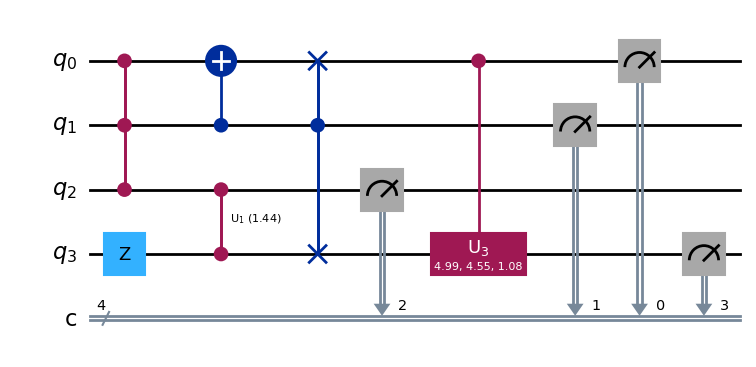

In [28]:
# matplotlib 형태로 출력합니다. 

circ.draw('mpl')

In [29]:
# 컴파일 되지 않은 latex 형태로 출력합니다.

circ.draw('latex_source')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qswap & \\qw & \\ctrl{3} & \\qw & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\ctrl{1} & \\ctrl{-1} & \\qw & \\qw & \\qw & \\ctrl{2} & \\qw & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\control\\qw & \\ctrl{1} & \\dstick{\\hspace{2.0em}\\mathrm{U_1}\\,(\\mathrm{1.44})} \\qw & \\qw & \\qw & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{3} :  } & \\lstick{{q}_{3} :  } & \\gate{\\mathrm{Z}} & \\control \\qw & \\qw & \\qw & \\qw & \\qswap \\qwx[-3] & \\qw & \\gate{\\mathrm{U_3}\\,(\\mathrm{4.993,4.55,1.078})} & \\qw & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} 

In [30]:
# 비트를 역순으로 그려봅니다.
circ.draw(reverse_bits=True)

┌───┐                   ┌──────────────────────────┐      ┌─┐
q_3: ┤ Z ├─■────────────X────┤ U3(4.9934,4.5498,1.0785) ├──────┤M├
     └───┘ │U1(1.4398)  │ ┌─┐└────────────┬─────────────┘      └╥┘
q_2: ──■───■────────────┼─┤M├─────────────┼─────────────────────╫─
       │                │ └╥┘             │              ┌─┐    ║ 
q_1: ──■────────■───────■──╫──────────────┼──────────────┤M├────╫─
       │      ┌─┴─┐     │  ║              │              └╥┘┌─┐ ║ 
q_0: ──■──────┤ X ├─────X──╫──────────────■───────────────╫─┤M├─╫─
              └───┘        ║                              ║ └╥┘ ║ 
c: 4/══════════════════════╩══════════════════════════════╩══╩══╩═
                           2                              1  0  3

In [31]:
# 초기상태를 함께 그려줍니다.

circ.draw(initial_state=True)

┌───┐                                         ┌─┐   
q_0: |0>──■──────┤ X ├─────X─────────────────■─────────────────┤M├───
          │      └─┬─┘     │                 │              ┌─┐└╥┘   
q_1: |0>──■────────■───────■─────────────────┼──────────────┤M├─╫────
          │                │ ┌─┐             │              └╥┘ ║    
q_2: |0>──■───■────────────┼─┤M├─────────────┼───────────────╫──╫────
        ┌───┐ │U1(1.4398)  │ └╥┘┌────────────┴─────────────┐ ║  ║ ┌─┐
q_3: |0>┤ Z ├─■────────────X──╫─┤ U3(4.9934,4.5498,1.0785) ├─╫──╫─┤M├
        └───┘                 ║ └──────────────────────────┘ ║  ║ └╥┘
 c: 0 4/══════════════════════╩══════════════════════════════╩══╩══╩═
                              2                              1  0  3

### 3-2 양자 회로 실행 결과의 시각화


In [32]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram # plot_histogram을 불러옵니다.

backend = AerSimulator() # 시뮬레이터를 지정합니다.
sampler = Sampler(mode=backend) # Sampler 프리미티브로 회로를 실행합니다.

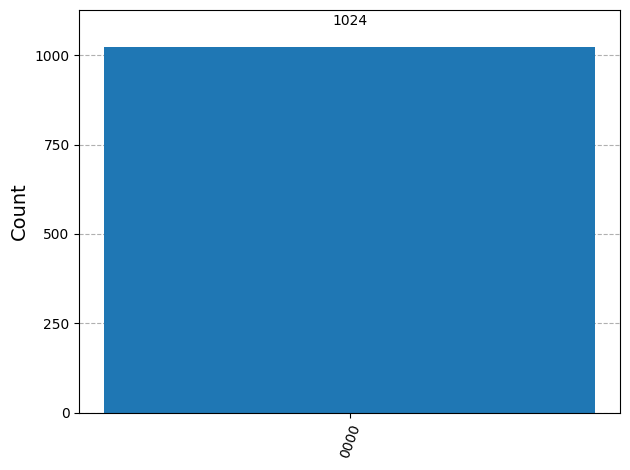

In [ ]:
# 회로의 실행 결과에서 count를 얻어 plot_histogram으로 그려봅니다.
from qiskit.transpiler import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend)
job = sampler.run([pm.run(circ)]) # 회로를 실행합니다

count = job.result()[0].data.c.get_counts()
plot_histogram(count)

### 3-3 양자 상태의 시각화

양자 상태(statevector)를 시각화 하는 여러가지 방법을 살펴 봅니다. 이 [API 문서](https://quantum.cloud.ibm.com/docs/en/api/qiskit/visualization)를 참고합니다.

In [1]:
from qiskit.visualization import * #qiskit.visualization에 있는 모드 기능을 불러옵니다.
from qiskit.quantum_info import Statevector #Statevector을 불러옵니다

In [4]:
# 실습을 위해 새로운 랜덤 회로를 작성

circ = random_circuit(3, 4, measure=False)

In [5]:
# Statevector 클래스를 이용해 회로의 state vector를 계산하여 저장한다.

state = Statevector(circ)

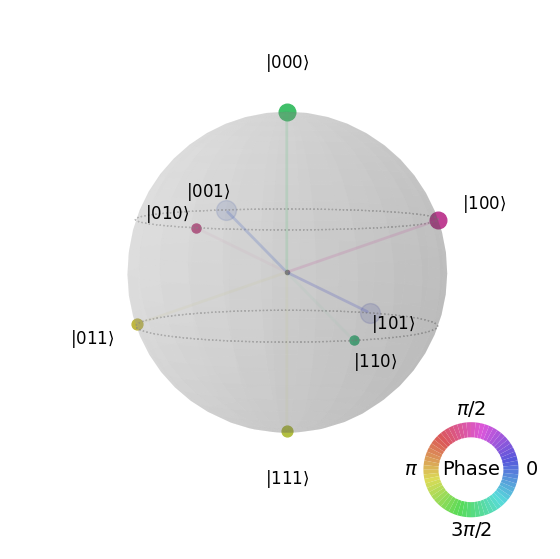

In [6]:
# 저장된 statevector를 plot_state_qsphere를 사용해 그려본다.

plot_state_qsphere(state)

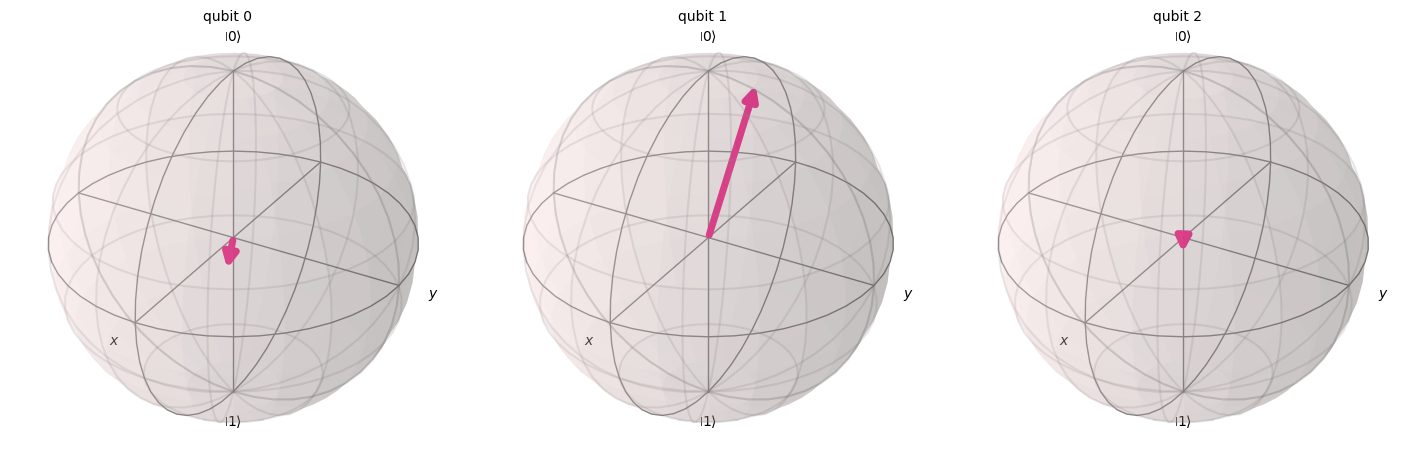

In [7]:
# 저장된 statevector를 plot_bloch_multivector를 사용해 그려본다.

plot_bloch_multivector(state)

### 중간 점검 퀴즈!

1. 다음중 실행되지 못하고 에러를 반환하는 코드는?

- A. `qc.draw('text')`
- B. `qc.draw('mpl')`
- C. `qc.draw('png')`
- D. `qc.draw('latex_source')`

In [ ]:
#C

2. 주어진 bloch_vector를 만들어 낼 수 있는 양자 회로를 만들어 보세요.

![img](./img/ex9.png)


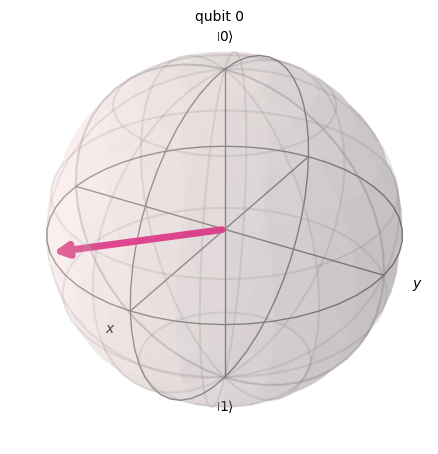

In [51]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt
from qiskit import QuantumCircuit
# insert code here
qc = QuantumCircuit(1)
qc.ry(pi/2,0)
qc.rz(-pi/4,0)
state = Statevector(qc)
state.draw('bloch')

3. 큐비트가  $|0\rangle$의 상태에서 시작했을 때, 다음중 어느 코드가 큐빗의 상태가  $|0\rangle$에 남아있도록 하는가?

In [ ]:
#A
qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

#B
qc.ry(pi/2,0)
qc.rx(pi/2,0)
qc.s(0)

#C
qc.s(0)
qc.ry(pi/2,0)
qc.rx(pi/2,0)

#D
qc.rx(pi/2,0)
qc.s(0)
qc.ry(pi/2,0)

In [ ]:
#A